In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
del df['Serial No.']

In [205]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

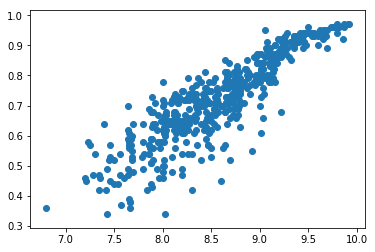

In [11]:
plt.scatter(df['CGPA'],y)
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regressor=LinearRegression()

In [71]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [189]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
y_pred=regressor.predict(X_test)

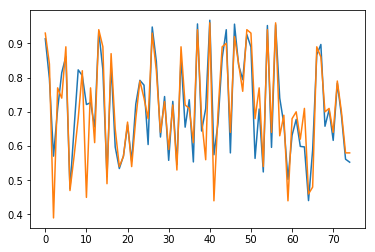

In [191]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [148]:
from sklearn.metrics import r2_score

In [193]:
r2_score(y_test,y_pred)

0.8207166983513675

In [150]:
from sklearn.model_selection import cross_val_score
accuracy =cross_val_score(estimator = regressor,X=X_train,y=y_train,cv=10)

In [151]:
accuracy.mean()

0.7939940785000688

## Polynomial Regression

In [152]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.20,random_state=42)

In [155]:

linreg2=LinearRegression()

In [156]:
linreg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
y_predLin=linreg2.predict(X_test)

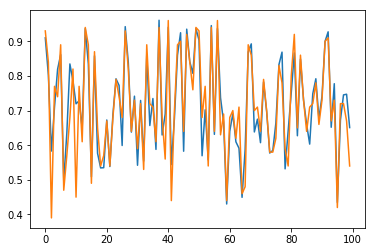

In [158]:
plt.plot(y_predLin)
plt.plot(y_test)
plt.show()

In [159]:
r2_score(y_test,y_predLin)

0.8265115552642633

In [160]:
from sklearn.model_selection import cross_val_score
accuracy =cross_val_score(estimator = linreg2,X=X_train,y=y_train,cv=10)


In [161]:
accuracy

array([-0.0119636 ,  0.77578659,  0.71464343,  0.70180791,  0.88270799,
        0.73255769,  0.80448284,  0.7349718 ,  0.87292056,  0.87963933])

## SVR

In [162]:
from sklearn.svm import SVR

In [163]:
regS=SVR(C=100, kernel='linear')

In [164]:
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
regS.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
y_predS=regS.predict(X_test)

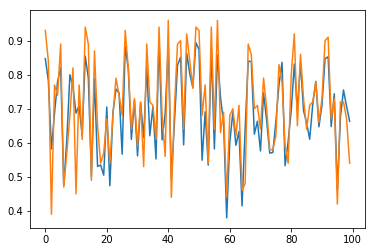

In [167]:
plt.plot(y_predS)
plt.plot(y_test)
plt.show()

In [168]:
r2_score(y_test,y_predS)

0.7681341865268728

In [169]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000,10000.500,200],'kernel':['rbf'],'gamma':[0.5,0.6,0.4,0.3,0.8,1,0.2,0.1,0.7]}]
gridsearch=GridSearchCV(estimator=regS,param_grid=parameters,cv=10,n_jobs=-1)
gridsearch=gridsearch.fit(X_train,y_train)

In [170]:
best_accuracy=gridsearch.best_score_
best_accuracy

0.7428105190425265

In [171]:
best_param=gridsearch.best_params_
best_param

{'C': 1, 'kernel': 'linear'}


## Decision Tree

In [172]:
from sklearn.tree import DecisionTreeRegressor

In [173]:
regD=DecisionTreeRegressor(random_state=0,max_depth=4)

In [174]:
regD.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [175]:
y_predD=regD.predict(X_test)

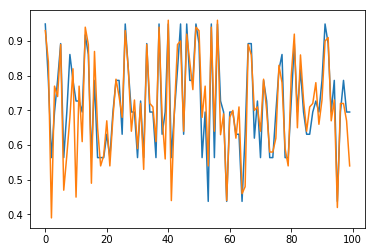

In [176]:
plt.plot(y_predD)
plt.plot(y_test)
plt.show()

In [177]:
r2_score(y_test,y_predD)

0.7852968216141512

In [178]:
from sklearn.model_selection import cross_val_score
accuracy =cross_val_score(estimator = regD,X=X_train,y=y_train,cv=10)


In [179]:
accuracy.mean()

0.710538852785227

## Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
randreg=RandomForestRegressor(n_estimators=3000,random_state=42)

In [182]:
randreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [183]:
y_predRF=randreg.predict(X_test)

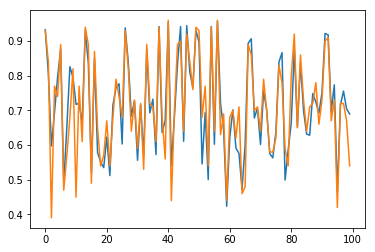

In [184]:
plt.plot(y_predRF)
plt.plot(y_test)
plt.show()

In [185]:
r2_score(y_test,y_predRF)

0.8113748708720436

In [126]:
from sklearn.model_selection import cross_val_score
accuracy =cross_val_score(estimator = randreg,X=X_train,y=y_train,cv=10)

In [128]:
accuracy.mean()

0.7761411075650757